# Parte de Montecarlo

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
import corner

In [2]:
np.random.seed(20)
#CREACION DE DATOS

#parametros
Npasos=1000

#valores iniciales
m=0.9
b=0.7

#datos
x= np.random.random(Npasos)
y= m*x+b
yerr= np.random.rand(Npasos)*0.2

#sigmas
sigm= 0.01 
sigb= 0.02

mlist=[]
blist=[]
probs= []


mlist.append(m)
blist.append(b)


In [3]:
np.random.seed(0)
#prior 
def prior(m,b):
    if ((0 < m <1) and (0< b <2.1)):
        p = 0.
        return p 
    else:
        p = -np.infty
        return p
    return p

#modelo
def mod(x,m,b):    
    return m*x+b

#likelihood
def likeli(m,b):
    xi2=(((y-mod(x,m,b))**2)/yerr**2).sum()
    return xi2


In [4]:
cont=0
probs.append(likeli(m,b))


np.random.seed(2)
for i in range(Npasos):
    #inicia la lista con el elemento que conocemos
    m0=mlist[0] 
    b0=blist[0]
    
    #elije puntos aleatorios
    mn= np.random.normal(m0, sigm)
    bn= np.random.normal(b0, sigb)
    
    #checar puntos aleatorios
    if (prior(mn,bn)):
        mn=m
        bn=b
    
    #checar likelihood
    probn= likeli(mn,bn)
    prob0= likeli(m,b)
    rest=  probn-prob0
    
    
    #si el nuevo > viejo aceptar los puntos y guardarlos
    if rest>0:
        
        mlist.append(mn)
        blist.append(bn)
        cont+=1
        #prob=prob0
        prob=probn
        probs.append(prob)
        
        
    #sino tomar una muestra aleatoria entre 0 y 1    
    else:
        exp=np.exp(rest)
        ptest=np.random.uniform(0.,1.)
        
        #si es mayor el cociente que el num aceptarlo
        if exp> ptest:

            mlist.append(mn)
            blist.append(bn)
            cont+=1
            
            prob= probn
            
            probs.append(prob)
        
        #sino quedarte con la muestra inicial y empezar
        else:

            mlist.append(m0)
            blist.append(b0)
            
            probs.append(prob0)


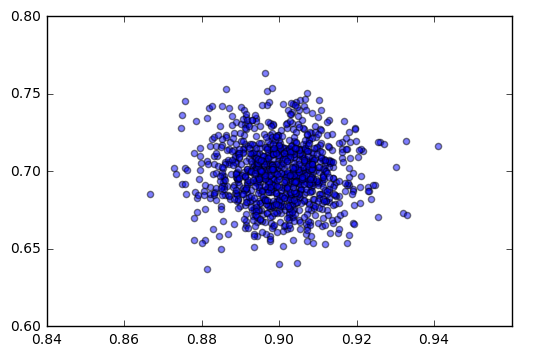

In [5]:
plt.scatter(mlist,blist,alpha=0.5)
plt.show()

In [6]:

#best=np.argmax(probs)
#con este promedio da un mejor valor mas cercano a los datos
best=(np.argmax(probs)-np.argmin(probs))/2
bestm=np.array(mlist[best])
bestb=np.array(blist[best])
print bestm, bestb
print np.shape(probs)

0.899559485723 0.684387672186
(1001L,)


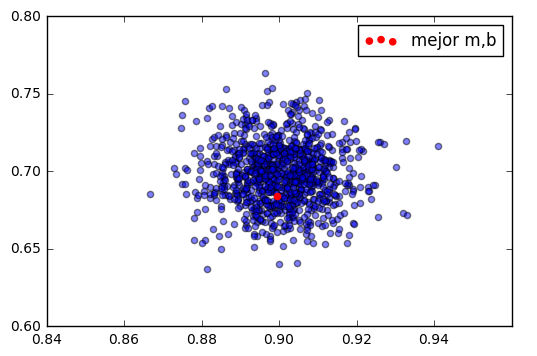

In [7]:
plt.scatter(mlist,blist,alpha=0.5)
plt.scatter(bestm,bestb, color='r',label='mejor m,b')
plt.legend()
plt.show()

# Parte de walkers

In [8]:
Nwalkers=100
paso=1000
arr_m=np.array(mlist)
arr_b=np.array(blist)

#print np.(arr_m), np.dim(arr_b)
np.shape(arr_m)

(1001L,)

[ 0.89878147] []


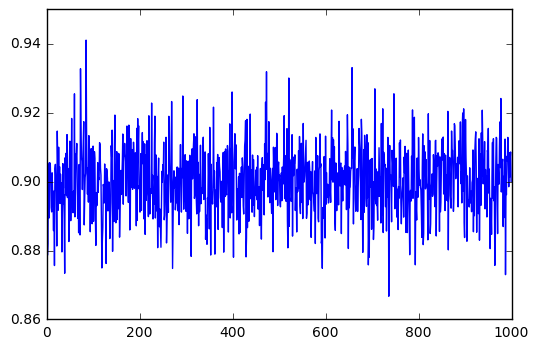

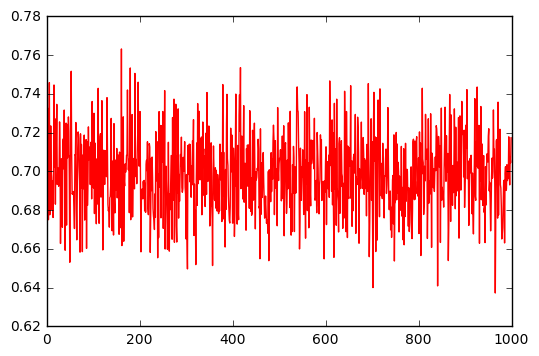

In [41]:
xpas=np.linspace(0,Nwalkers,paso)

#
for i in xrange(Nwalkers):
    plt.plot(arr_m[paso*i:paso*(i+1)],color='b')
plt.show()


for i in xrange(Nwalkers):
    plt.plot(arr_b[paso*i:paso*(i+1)],color='r')
plt.show()

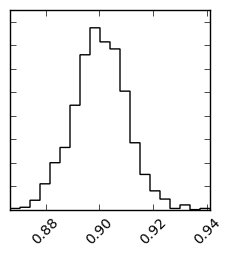

In [77]:
#para m
corner.corner(arr_m)

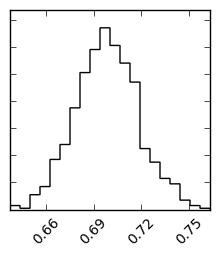

In [76]:
#para b
corner.corner(arr_b)

In [ ]:
samples=